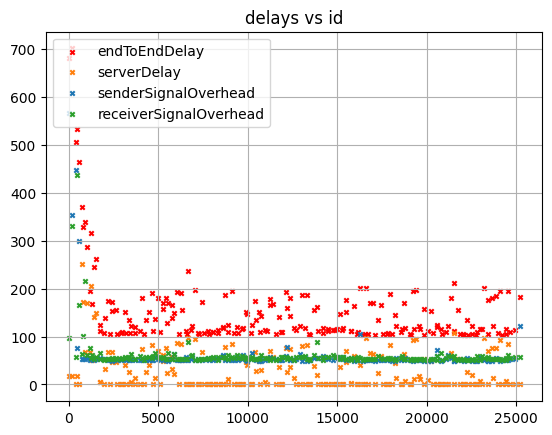

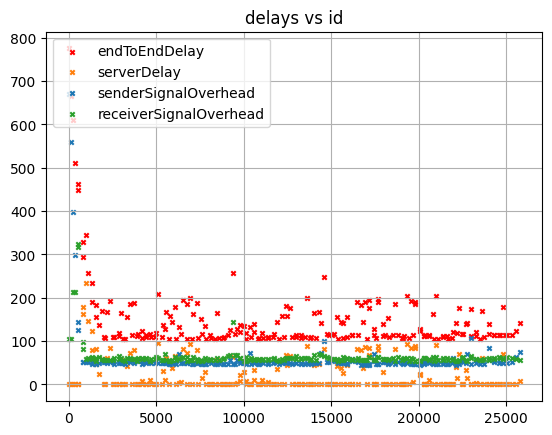

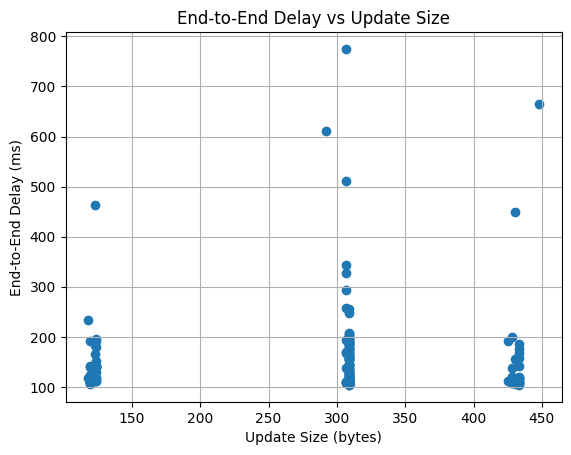

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Read metrics.csv
df2_slow = pd.read_csv('benchmark_data/s2-signal-slow.csv')
df2_fast = pd.read_csv('benchmark_data/s2-signal-fast.csv')
#df3_slow = pd.read_csv('benchmark_data/s3-signal-slow.csv')
#df3_fast = pd.read_csv('benchmark_data/s3-signal-fast.csv')

output_dir = 'benchmark_plots'

palette = sns.color_palette("tab10")
sendingColor = palette[0]
serverColor = palette[1]
receivingColor = palette[2]

# Compute delays
for df in [df2_slow, df2_fast]: #, df3_slow, df3_fast]: 
    df['endToEndDelay'] = df['receivingTimestamp'] - df['sendingTimestamp']
    df['serverDelay'] = df['serverDeliveredTimestamp'] - df['serverReceivedTimestamp']
    df['signalOverhead'] = df['endToEndDelay'] - df['serverDelay']
    df['senderSignalOverhead'] = df['serverReceivedTimestamp'] - df['sendingTimestamp']
    df['receiverSignalOverhead'] = df['receivingTimestamp'] - df['serverDeliveredTimestamp'] 

    t0 = pd.to_datetime(df['sendingTimestamp'], unit="ms").min()

    df['sendingTimestamp_'] = (pd.to_datetime(df['sendingTimestamp'], unit="ms") - t0).dt.total_seconds() * 1000
    df['serverReceivedTimestamp_'] = (pd.to_datetime(df['serverReceivedTimestamp'], unit="ms")  - t0).dt.total_seconds() * 1000
    df['serverDeliveredTimestamp_'] = (pd.to_datetime(df['serverDeliveredTimestamp'], unit="ms") - t0).dt.total_seconds() * 1000
    df['receivingTimestamp_'] = (pd.to_datetime(df['receivingTimestamp'], unit="ms") - t0).dt.total_seconds() * 1000

def plot_delays(df): 
    # Plot delays vs updateSize
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.scatter(df['sendingTimestamp_'], df['endToEndDelay'], s=10, c='r', marker="x", label='endToEndDelay')
    ax1.scatter(df['sendingTimestamp_'], df['serverDelay'], s=10, color=serverColor, marker="x", label='serverDelay')
    ax1.scatter(df['sendingTimestamp_'], df['senderSignalOverhead'], s=10, color=sendingColor, marker="x", label='senderSignalOverhead')
    ax1.scatter(df['sendingTimestamp_'], df['receiverSignalOverhead'], s=10, marker="x", color=receivingColor, label='receiverSignalOverhead')
    plt.legend(loc='upper left')
    plt.title('delays vs id')
    plt.grid(True)
    plt.show()

plot_delays(df2_slow)
plot_delays(df2_fast)

# Plot end_to_end_delay vs updateSize
plt.figure()
plt.scatter(df['updateSize'], df['endToEndDelay'])
plt.xlabel('Update Size (bytes)')
plt.ylabel('End-to-End Delay (ms)')
plt.title('End-to-End Delay vs Update Size')
plt.grid(True)
plt.show()

# Plot server_delay vs updateSize
# plt.figure()
# plt.scatter(df['updateSize'], df['serverDelay'])
# plt.xlabel('Update Size (bytes)')
# plt.ylabel('Server Delay (ms)')
# plt.title('Server Delay vs Update Size')
# plt.grid(True)
# plt.show()

# # Plot applyTime vs updateSize
# plt.figure()
# plt.scatter(df['updateSize'], df['applyTime'])
# plt.xlabel('Update Size (bytes)')
# plt.ylabel('Apply Time (ms)')
# plt.title('Apply Time vs Update Size')
# plt.grid(True)
# plt.show()

# # Plot end_to_end_delay vs server_delay
# plt.figure()
# plt.scatter(df['endToEndDelay'], df['serverDelay'])
# plt.xlabel('End-to-End Delay (ms)')
# plt.ylabel('Server Delay (ms)')
# plt.title('End-to-End Delay vs Update Size')
# plt.grid(True)
# plt.show()

# plt.figure()
# plt.scatter(df['updateSize'], df['endToEndDelay'] - df['serverDelay'])
# plt.xlabel('Update Size (bytes)')
# plt.ylabel('End-to-End Delay (ms) - Server Delay (ms)')
# plt.title('Network Delay vs Update Size')
# plt.grid(True)
# plt.show()

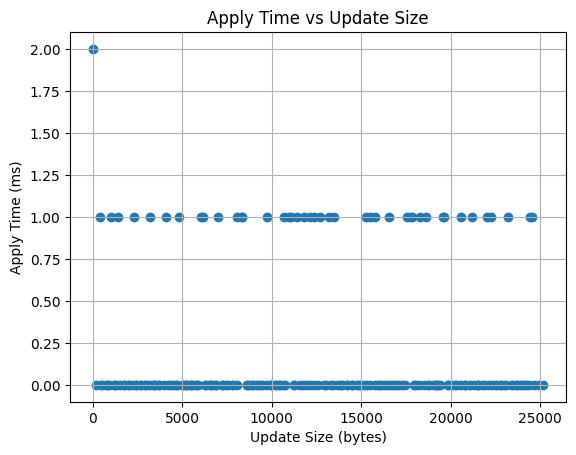

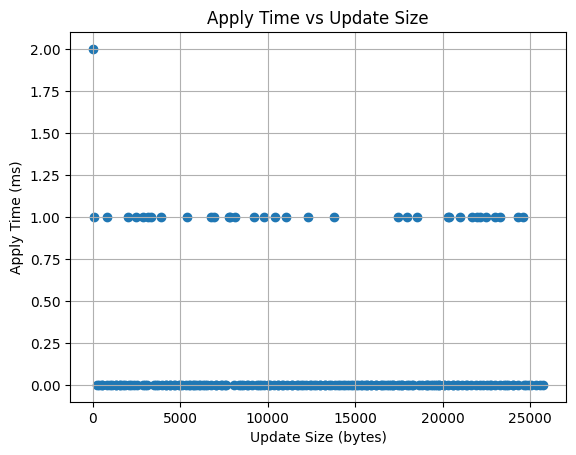

In [2]:
def plot_applyTime(df):
    # Plot applyTime vs updateSize
    plt.figure()
    plt.scatter(df['sendingTimestamp_'], df['applyTime'])
    plt.xlabel('Update Size (bytes)')
    plt.ylabel('Apply Time (ms)')
    plt.title('Apply Time vs Update Size')
    plt.grid(True)
    plt.show()

plot_applyTime(df2_slow)
plot_applyTime(df2_fast)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


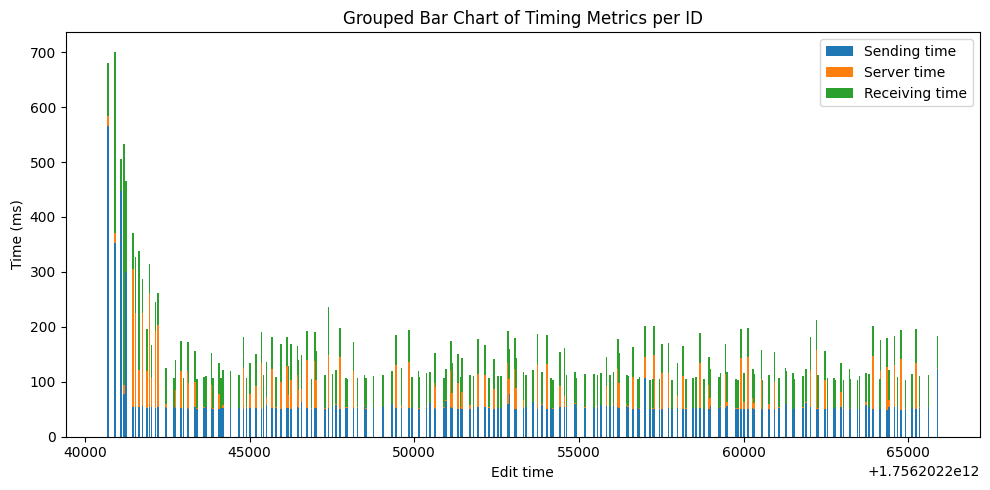

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


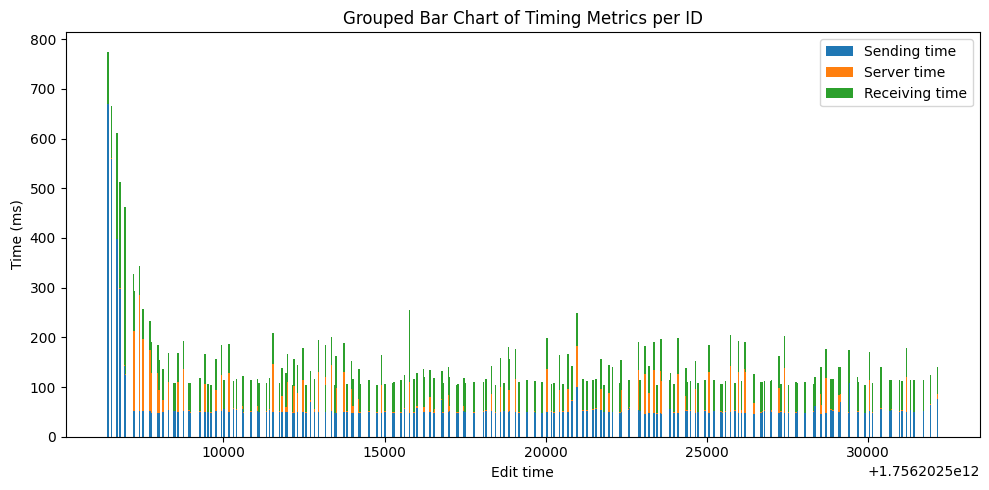

In [3]:
def plot_grouped_bar_and_scatter(df, name):
    # 1. Grouped bar chart of timing metrics per id
    ids = df['id'].astype(str).tolist()
    latencies = df['serverDelay'].tolist()
    overheads = df['signalOverhead'].tolist()
    senderOverheads = df['senderSignalOverhead'].tolist()
    receiverOverheads = df['receiverSignalOverhead'].tolist()
    apply_times = df['applyTime'].tolist()

    x = df['sendingTimestamp']
    width = 50
    
    # Plot stacked bars
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x, senderOverheads, width=width, color=sendingColor, label='Sending time')
    ax.bar(x, latencies, bottom=senderOverheads,width=width, color=serverColor, label='Server time')
    shift = [a + b for (a, b) in zip(senderOverheads, latencies)]
    ax.bar(x, receiverOverheads, bottom=shift,width=width, color=receivingColor, label='Receiving time')
    #ax.bar([p - width for p in x], latencies, width, label='Network Latency')
    #ax.bar([p - width for p in x], overheads, width, bottom=latencies, label='Signal Overhead')
    #bottom_stack = overheads
    #ax.bar(x, apply_times, bottom=bottom_stack, label='CRDT Apply Time')

    #ax.set_xticks(x)
    #ax.set_xticklabels(ids, rotation=45, ha='right')
    ax.set_xlabel('Edit time')
    ax.set_ylabel('Time (ms)')
    ax.set_title('Grouped Bar Chart of Timing Metrics per ID')
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{name}-barchart.svg')
    plt.savefig(f'{output_dir}/{name}-barchart.eps')
    plt.savefig(f'{output_dir}/{name}-barchart.pdf')
    plt.show()

plot_grouped_bar_and_scatter(df2_slow, 's2-slow')
plot_grouped_bar_and_scatter(df2_fast, 's2-fast')
#plot_grouped_bar_and_scatter(df3_slow, 's3-slow')
#plot_grouped_bar_and_scatter(df3_fast, 's3-fast')

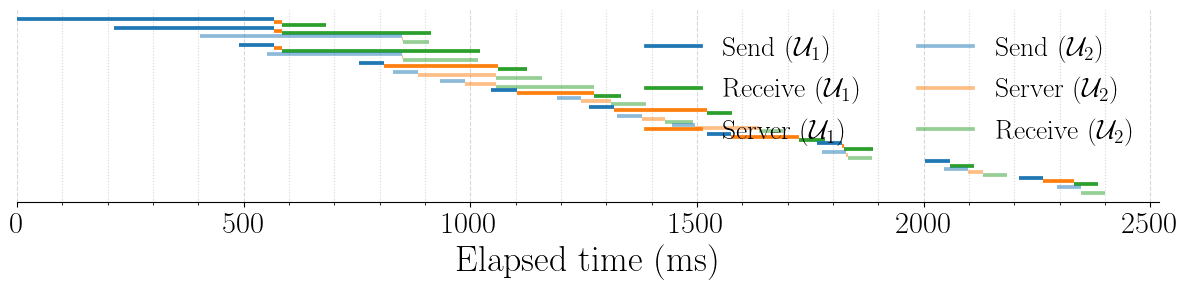

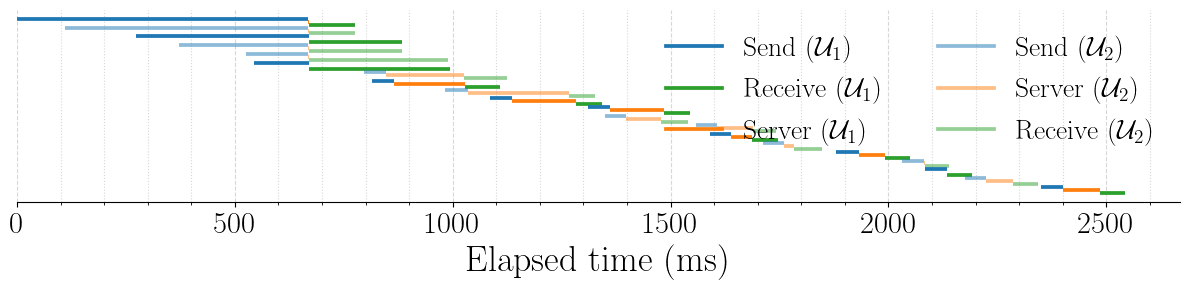

In [4]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.lines import Line2D
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],  # let LaTeX pick the default serif (Times)
    "text.latex.preamble": r"\usepackage{amsmath}",
    "axes.titlesize" : 28,
    "axes.labelsize" : 26,
    "lines.linewidth" : 5,
    "lines.markersize" : 18,
    "xtick.labelsize" : 22,
    "ytick.labelsize" : 22,
    "legend.fontsize": 20
})

cutoff = 20

def plot_staggered(df, name): 
    height = 3
    fig, ax = plt.subplots(figsize=(12, height))
    linewidth=18 * height/cutoff
    for i in range(cutoff):
        sender = df['sender'].iloc[i]
        ypos = 3*i # + (math.ceil(len(df))+1 if df['sender'].iloc[i] == 1 else 0)
        alpha = 1 if df['sender'].iloc[i] == 0 else 0.5
        
        start1 = df['sendingTimestamp_'].iloc[i]
        end1 = df['serverReceivedTimestamp_'].iloc[i]
        #plt.plot(start-0.02, y_positions[i], 'o' if df['sender'].iloc[i] == 0 else 'x', color='black')  # mark sending point
        
        ax.hlines(y=ypos, xmin=start1, xmax=end1,
                   color=sendingColor,# if int(df['id'].iloc[i]) % 2 == 0 else 'green',
                   linewidth=linewidth, alpha=alpha)
    
        start2 = end1
        end2 = df['serverDeliveredTimestamp_'].iloc[i]
        ax.hlines(y=ypos+1, xmin=start2, xmax=end2,
                   color=serverColor,# if int(df['id'].iloc[i]) % 2 == 0 else 'green',
                   linewidth=linewidth, alpha=alpha)
    
        start3 = end2
        end3 = df['receivingTimestamp_'].iloc[i]
        ax.hlines(y=ypos+2, xmin=start3, xmax=end3,
                   color=receivingColor,# if int(df['id'].iloc[i]) % 2 == 0 else 'green',
                   linewidth=linewidth, alpha=alpha)

        #if sender==0:
        #    ax.plot(start1, ypos, 'o', color='black')
        #    ax.plot(end3, ypos, 'D', color='black')
        #else:
        #    ax.plot(start1, ypos, 'D', color='gray')   # e.g. diamond marker for sender 1
        #    ax.plot(end3,   ypos, 'o', color='gray')
        #ax.text(start1, ypos, str(sender), color='white', fontsize=5,
        #        fontweight='bold',
        #        ha='center', va='center')
        #ax.text(end3, ypos, str(1-sender), color='white', fontsize=5,
        #        fontweight='bold',
        #        ha='center', va='center')
        
        #plt.plot(end, y_positions[i], 'x', color='red')      # mark receiving point

    legend_handles = [
        Line2D([0], [0], color=sendingColor, linewidth=linewidth, alpha=1, label=r'Send ($\mathcal{U}_1$)'),
        Line2D([0], [0], color=receivingColor, linewidth=linewidth, alpha=1, label=r'Receive ($\mathcal{U}_1$)'),
        Line2D([0], [0], color=serverColor, linewidth=linewidth, alpha=1, label=r'Server ($\mathcal{U}_1$)'),
        Line2D([0], [0], color=sendingColor, linewidth=linewidth, alpha=0.5, label=r'Send ($\mathcal{U}_2$)'),
        Line2D([0], [0], color=serverColor, linewidth=linewidth, alpha=0.5, label=r'Server ($\mathcal{U}_2$)'),
        Line2D([0], [0], color=receivingColor, linewidth=linewidth, alpha=0.5, label=r'Receive ($\mathcal{U}_2$)')
    ]
    ax.legend(handles=legend_handles, loc='upper right', ncol=2, frameon=False)
    
    # Invert y-axis so first message is at top
    ax.invert_yaxis()
    
    # Remove top x-axis and left/right y-axes
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Remove left y-axis ticks and labels
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_ticklabels([])
    
    ax.set_xlim(left=0)
    ax.xaxis.grid(True, which='minor', linestyle='dotted', alpha=0.5)
    ax.xaxis.set_minor_locator(MultipleLocator(100))
    
    #ax.set_title('[S2] Message Transmission Timeline')
    ax.set_xlabel('Elapsed time (ms)')
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{name}-staggered.pdf')
    plt.show()

plot_staggered(df2_slow, 's2-slow')
plot_staggered(df2_fast, 's2-fast')
#plot_staggered(df3_slow, 's3-slow')
#plot_staggered(df3_fast, 's3-fast')

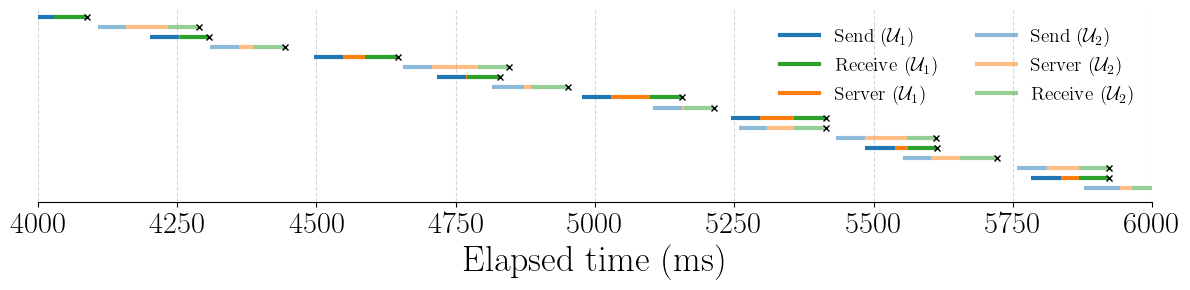

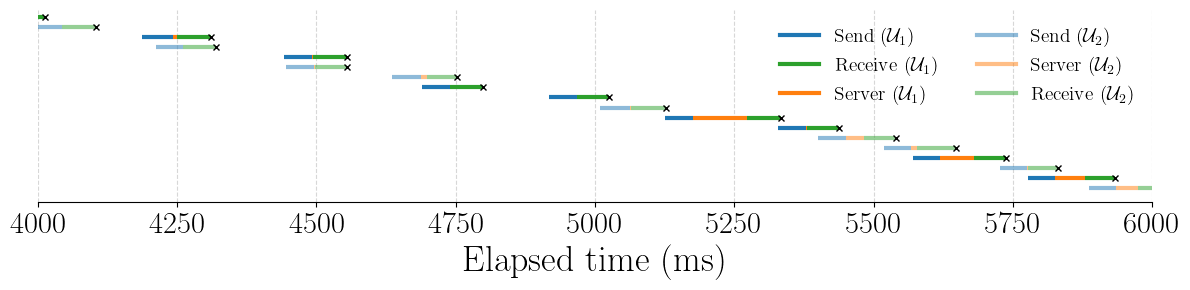

In [5]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.lines import Line2D
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],  # let LaTeX pick the default serif (Times)
    "text.latex.preamble": r"\usepackage{amsmath}",
    "axes.titlesize" : 28,
    "axes.labelsize" : 26,
    "lines.linewidth" : 5,
    "lines.markersize" : 18,
    "xtick.labelsize" : 22,
    "ytick.labelsize" : 22,
    "legend.fontsize": 14
})

def plot_staggered(df, name): 
    height = 3
    fig, ax = plt.subplots(figsize=(12, height))

    n = int(len(df) * 0.1)   # number of rows to drop
    data = df.iloc[n:].reset_index(drop=True)
    cutoff = len(data)    
    start_ms = 4000
    end_ms = 6000
    linewidth=3 #18 * height/cutoff
    for i in range(cutoff):
        sender = data['sender'].iloc[i]
        ypos = 3*i
        alpha = 1 if data['sender'].iloc[i] == 0 else 0.5
        
        start1 = data['sendingTimestamp_'].iloc[i]
        end1 = data['serverReceivedTimestamp_'].iloc[i]
        
        ax.hlines(y=ypos, xmin=start1, xmax=end1,
                   color=sendingColor,
                   linewidth=linewidth, alpha=alpha)
    
        start2 = end1
        end2 = data['serverDeliveredTimestamp_'].iloc[i]
        ax.hlines(y=ypos, xmin=start2, xmax=end2,
                   color=serverColor,
                   linewidth=linewidth, alpha=alpha)
    
        start3 = end2
        end3 = data['receivingTimestamp_'].iloc[i]
        ax.hlines(y=ypos, xmin=start3, xmax=end3,
                   color=receivingColor,
                   linewidth=linewidth, alpha=alpha)

        x_cross = data['receivingTimestamp_'].iloc[i] + data['applyTime'].iloc[i]
        y_cross = ypos   # last bar is the receive stage
        ax.plot(x_cross, y_cross, marker='x', color='black', markersize=4, zorder=10)

        #if sender==0:
        #    ax.plot(start1, ypos, 'o', color='black')
        #    ax.plot(end3, ypos, 'D', color='black')
        #else:
        #    ax.plot(start1, ypos, 'D', color='gray')   # e.g. diamond marker for sender 1
        #    ax.plot(end3,   ypos, 'o', color='gray')
        #ax.text(start1, ypos, str(sender), color='white', fontsize=5,
        #        fontweight='bold',
        #        ha='center', va='center')
        #ax.text(end3, ypos, str(1-sender), color='white', fontsize=5,
        #        fontweight='bold',
        #        ha='center', va='center')
        
        #plt.plot(end, y_positions[i], 'x', color='red')      # mark receiving point

    # Collect all y positions that fall within the zoomed-in x-window
    visible_y = []
    for i in range(cutoff):
        ypos = 3 * i
        t_start = data['sendingTimestamp_'].iloc[i]
        t_end   = data['receivingTimestamp_'].iloc[i]
        if t_end >= start_ms and t_start <= end_ms:  # intersects window
            visible_y.extend([ypos, ypos+1, ypos+2])
    
    if visible_y:
        ymin, ymax = min(visible_y), max(visible_y)
        ax.set_ylim(ymin - 2, ymax + 2)  # add small margin
    
    legend_handles = [
        Line2D([0], [0], color=sendingColor, linewidth=linewidth, alpha=1, label=r'Send ($\mathcal{U}_1$)'),
        Line2D([0], [0], color=receivingColor, linewidth=linewidth, alpha=1, label=r'Receive ($\mathcal{U}_1$)'),
        Line2D([0], [0], color=serverColor, linewidth=linewidth, alpha=1, label=r'Server ($\mathcal{U}_1$)'),
        Line2D([0], [0], color=sendingColor, linewidth=linewidth, alpha=0.5, label=r'Send ($\mathcal{U}_2$)'),
        Line2D([0], [0], color=serverColor, linewidth=linewidth, alpha=0.5, label=r'Server ($\mathcal{U}_2$)'),
        Line2D([0], [0], color=receivingColor, linewidth=linewidth, alpha=0.5, label=r'Receive ($\mathcal{U}_2$)')
    ]
    ax.legend(handles=legend_handles, loc='upper right', ncol=2, frameon=False)
    
    # Invert y-axis so first message is at top
    ax.invert_yaxis()
    
    # Remove top x-axis and left/right y-axes
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Remove left y-axis ticks and labels
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_ticklabels([])
    
    ax.set_xlim(left=start_ms)
    ax.set_xlim(right=end_ms)
    ax.xaxis.grid(True, which='minor', linestyle='dotted', alpha=0.5)
    ax.xaxis.set_minor_locator(MultipleLocator(1000))
    
    #ax.set_title('[S2] Message Transmission Timeline')
    ax.set_xlabel('Elapsed time (ms)')
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{name}-staggered.pdf')
    plt.show()

plot_staggered(df2_slow, 's2-slow')
plot_staggered(df2_fast, 's2-fast')
#plot_staggered(df3_slow, 's3-slow')
#plot_staggered(df3_fast, 's3-fast')

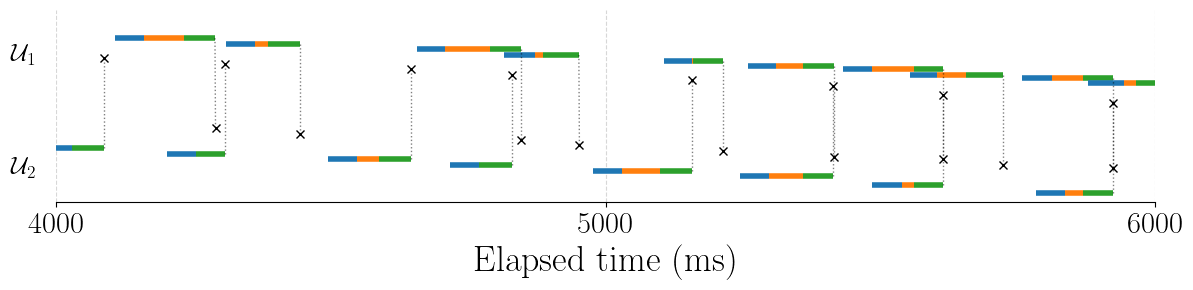

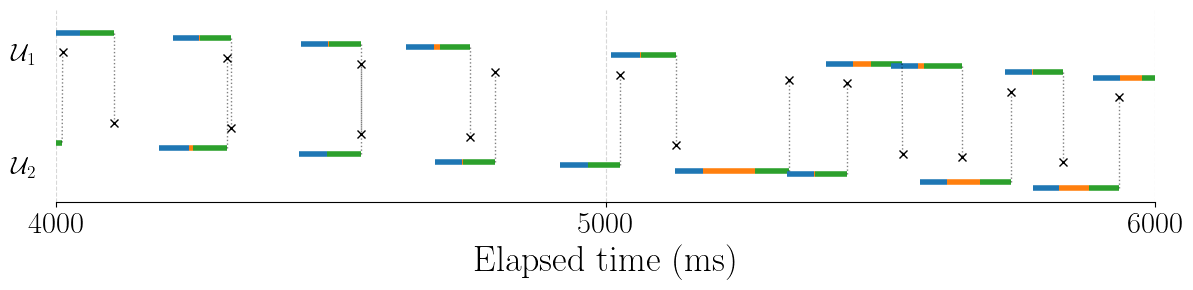

In [6]:
import numpy as np
import matplotlib.patheffects as pe

# Helpers
def next_send_after(times, t):
    idx = np.searchsorted(times, t, side='right')
    return times[idx] if idx < len(times) else None

def plot_staggered2(df, name): 
    height = 3
    fig, ax = plt.subplots(figsize=(12, height))
    start_ms = 4000
    end_ms = 6000

    n = int(len(df) * 0.1)   # number of rows to drop
    data = df.iloc[n:].reset_index(drop=True)

    # Lane y-positions (just two)
    y_u1, y_u2 = 2.0, 0.0
    lane_h = 0.35  # bar thickness
    
    # Precompute send times per user (already window-trimmed df: `data`)
    send_u1 = np.sort(data.loc[data['sender'] == 0, 'sendingTimestamp_'].values)
    send_u2 = np.sort(data.loc[data['sender'] == 1, 'sendingTimestamp_'].values)
    
    # Draw bars on receiver’s lane + markers and the “before next send” connector
    start_i = np.searchsorted(data['sendingTimestamp_'].values, start_ms, side='left')
    for i, row in data.iterrows():
        sender = int(row['sender'])
        t0 = row['sendingTimestamp_']
        t1 = row['serverReceivedTimestamp_']
        t2 = row['serverDeliveredTimestamp_']
        t3 = row['receivingTimestamp_']
        t_apply = t3 + row['applyTime']
    
        # Choose lane: receiver is the other user
        # set j to index of this entry when considering only a window starting at start_ms
        j = i - start_i
        lane_y = y_u2 if sender == 0 else y_u1
        lane_y -= 0.05*i -1
        lane_other = y_u1-0.4 if sender == 0 else y_u2+0.4
        lane_other -= 0.05*i -1
    
        # Stage bars (same colors you already use)
        ax.hlines(lane_y, t0, t1, color=sendingColor,   linewidth=4) #, solid_capstyle='butt')
        ax.hlines(lane_y, t1, t2, color=serverColor,    linewidth=4) #, solid_capstyle='butt')
        ax.hlines(lane_y, t2, t3, color=receivingColor, linewidth=4) #, solid_capstyle='butt')
    
        # Mark send (on sender lane) and apply (on receiver lane)
        #ax.plot(t0, y_u1 if sender == 0 else y_u2, marker='o', ms=5, mfc='white', mec='k', zorder=5)
        ax.plot(t_apply, lane_other, marker='x', ms=6, mec='k', mfc='k', zorder=6)
        # Vertical connector between end of receiving bar and cross in other lane
        ax.plot([t3, t_apply], [lane_y, lane_other],
        color="black", linewidth=1, linestyle="dotted", alpha=0.5, zorder=5)
    
    
    # Tight y around two lanes
    ax.set_xlim(start_ms, end_ms)
    #ax.xaxis.grid(True, which='minor', linestyle='dotted', alpha=0.5)
    ax.xaxis.grid(False)
    ax.xaxis.set_major_locator(MultipleLocator(1000))
    
    ax.set_ylim(-0.6, 2.8)
    # Label lanes directly
    ax.text(start_ms - 0.02*(end_ms-start_ms), y_u1, r"$\mathcal{U}_1$", ha="right", va="center", fontsize=18)
    ax.text(start_ms - 0.02*(end_ms-start_ms), y_u2, r"$\mathcal{U}_2$", ha="right", va="center", fontsize=18)
    
    # Remove top x-axis and left/right y-axes
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Remove left y-axis ticks and labels
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel('Elapsed time (ms)')
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{name}-staggered-annotated.pdf')
    plt.show()
plot_staggered2(df2_slow, "s2-slow")
plot_staggered2(df2_fast, "s2-fast")

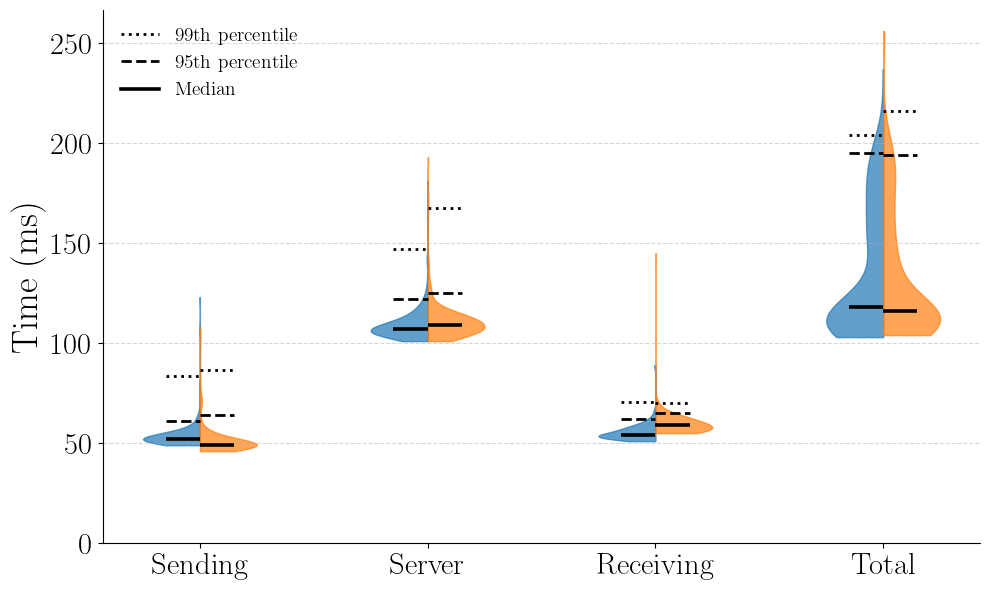

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_split_violins(df_slow, df_fast, name, title=None):
    fig, ax = plt.subplots(figsize=(10, 6))

    cols = ['senderSignalOverhead', 'signalOverhead', 'receiverSignalOverhead', 'endToEndDelay']
    data_slow = [df_slow[c].dropna() for c in cols]
    data_fast = [df_fast[c].dropna() for c in cols]
    
    # --- ignore first 10% of entries ---
    data_slow = [col.iloc[int(len(col) * 0.1):] for col in data_slow]
    data_fast = [col.iloc[int(len(col) * 0.1):] for col in data_fast]
    
    positions = [1, 2, 3, 4]
    
    colors = [(0.5, 0.5, 0.5, 1) for _ in range(4)]#palette[:3] + ['grey']
    face_colors = [(0.8, 0.8, 0.8, 0.1) for _ in range(4)]
    
    # Slow = left half
    parts_slow = ax.violinplot(
        data_slow,
        positions=positions,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        side="low",
    )
    for pc, face_color, color in zip(parts_slow['bodies'], face_colors, colors):
        pc.set_alpha(0.7)
        pc.set_edgecolor((palette[0][0], palette[0][1], palette[0][2], 1))
        pc.set_facecolor((palette[0][0], palette[0][1], palette[0][2], 0.1))
        #pc.set_alpha(1)
    #parts_slow['cmedians'].set_colors(colors)

    # Fast = right half
    parts_fast = ax.violinplot(
        data_fast,
        positions=positions,
        showmeans=False,
        showmedians=False,
        showextrema=False,
        side="high"
    )

    for pc, face_color, color in zip(parts_fast['bodies'], face_colors, colors):
        pc.set_alpha(0.7)
        pc.set_edgecolor((palette[1][0], palette[1][1], palette[1][2], 1))
        pc.set_facecolor((palette[1][0], palette[1][1], palette[1][2], 0.1))
        #pc.set_alpha(1)
    #parts_fast['cmedians'].set_colors(colors)
    tick_w = 0.15  # half-length of side ticks for medians/percentiles


    # Percentile markers (shared width for both halves)
    for pos, d_slow, d_fast, color in zip(positions, data_slow, data_fast, colors):
        color = 'black'
        
        p95, p99 = np.percentile(d_slow, [95, 99])
        med = np.median(d_slow)
        ax.hlines(med, pos - tick_w, pos, color=color, linewidth=2.6)
        ax.hlines(p95, pos - tick_w, pos, color=color, linestyle='--', linewidth=2)
        ax.hlines(p99, pos - tick_w, pos, color=color, linestyle='dotted', linewidth=2)

        p95, p99 = np.percentile(d_fast, [95, 99])
        med = np.median(d_fast)
        ax.hlines(med, pos, pos + tick_w, color=color, linewidth=2.6)
        ax.hlines(p95, pos, pos + tick_w, color=color, linestyle='--', linewidth=2)
        ax.hlines(p99, pos, pos + tick_w, color=color, linestyle='dotted', linewidth=2)
        

    ax.set_xticks(positions)
    ax.set_xticklabels(['Sending', 'Server', 'Receiving', 'Total'])
    if title:
        ax.set_title(title)
    ax.set_ylabel('Time (ms)')
    ax.set_ylim(bottom=0)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.grid(True, which='major', linestyle='dashed', alpha=0.5)
    ax.yaxis.grid(True, which='minor', linestyle='dotted', alpha=0.5)
    ax.yaxis.set_minor_locator(MultipleLocator(100))

    # Legend: mapping halves + tick styles
    legend_elems = [
        Line2D([0], [0], linestyle='dotted', linewidth=2, color='k', label='99th percentile'),
        Line2D([0], [0], linestyle='--', linewidth=2, color='k', label='95th percentile'),
        Line2D([0], [0], linestyle='-', linewidth=2.6, color='k', label='Median'),
    ]
    ax.legend(handles=legend_elems, loc='upper left', frameon=False)

    plt.tight_layout()
    plt.savefig(f'{output_dir}/{name}-split-violins.pdf')

plot_split_violins(df2_slow, df2_fast, 's2-slow-vs-fast')
#plot_split_violins(df3_slow, df3_fast, 's3-slow-vs-fast')